# Episode 03-a: Improve board visualization

TODO

**Goals for this episode:**
- show a visual board rendering by leveraging matplotlib

**Table of content**
- [Create the puzzle and a board](#1)

# TODO table of content
# TODO functions documentation

# 1. Create the puzzle and a board <a name="1" />

In [1]:
from episode01 import clues2x2, Board, BoardMark
import numpy as np

In [2]:
# clues for mini game
clues2x2

{'rows': [1, 2], 'cols': [2, 1]}

In [3]:
board2x2 = Board(clues2x2)
board2x2.prettyprint()
board2x2.mark(0, 1, BoardMark.FILLER) 
board2x2.mark(1, 1, BoardMark.BLACK) 
board2x2.prettyprint()

cols: 2 1
rows:
1
2
[['.' '.']
 ['.' '.']]
cols: 2 1
rows:
1
2
[['.' 'x']
 ['.' 'o']]


# 2. Experiments

## 2.1. Basic board setup

In [4]:
%matplotlib inline

In [5]:
import matplotlib.pyplot as plt

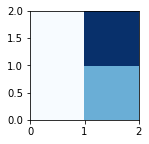

In [6]:
# start from basic example

data = board2x2.states
# set some canvas
fig, ax = plt.subplots(figsize=(2,2))
# draw a heatmap
heatmap = ax.pcolor(data, cmap=plt.cm.Blues)

# ensure square cells
ax.set_aspect("equal")

# -1 very light blue, 0 filler, 1 black

## 2.2. Better ticks placement

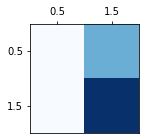

In [7]:
# better ticks placement : one per cell and centered

data = board2x2.states
# set some canvas
fig, ax = plt.subplots(figsize=(2,2))
# draw a heatmap
heatmap = ax.pcolor(board2x2.states, cmap=plt.cm.Blues)

# ensure square cells
ax.set_aspect("equal")

# put the major ticks at the middle of each cell
ax.set_xticks(np.arange(data.shape[1]) + 0.5, minor=False)
ax.set_yticks(np.arange(data.shape[0]) + 0.5, minor=False)

# put labels on top
ax.invert_yaxis()
ax.xaxis.tick_top()


## 2.3. Set the clues as label

[Text(0, 0.5, '1'), Text(0, 1.5, '2')]

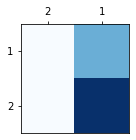

In [8]:
# set the clues as labels 

data = board2x2.states
# set some canvas
fig, ax = plt.subplots(figsize=(2,2))
# draw a heatmap
heatmap = ax.pcolor(board2x2.states, cmap=plt.cm.Blues)

# ensure square cells
ax.set_aspect("equal")

# put the major ticks at the middle of each cell
ax.set_xticks(np.arange(data.shape[1]) + 0.5, minor=False)
ax.set_yticks(np.arange(data.shape[0]) + 0.5, minor=False)

# put labels on top
ax.invert_yaxis()
ax.xaxis.tick_top()

# set labels
column_labels = clues2x2['cols']
row_labels = clues2x2['rows']

ax.set_xticklabels(column_labels, minor=False)
ax.set_yticklabels(row_labels, minor=False)


## 2.4. Annotate fillers with x

Text(1.5, 0.5, 'X')

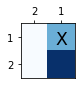

In [9]:
# annotate fillers with x

data = board2x2.states
# set some canvas
fig, ax = plt.subplots(figsize=(1,1))
# draw a heatmap
heatmap = ax.pcolor(board2x2.states, cmap=plt.cm.Blues)

# ensure square cells
ax.set_aspect("equal")

# put the major ticks at the middle of each cell
ax.set_xticks(np.arange(data.shape[1]) + 0.5, minor=False)
ax.set_yticks(np.arange(data.shape[0]) + 0.5, minor=False)

# put labels on top
ax.invert_yaxis()
ax.xaxis.tick_top()

# set labels
column_labels = clues2x2['cols']
row_labels = clues2x2['rows']

ax.set_xticklabels(column_labels, minor=False)
ax.set_yticklabels(row_labels, minor=False)


# annotate fillers
# must compute the coordinates from index
plt.text(1.5, 0.5, 'X', 
         verticalalignment='center_baseline',
         horizontalalignment='center',
         fontsize='xx-large')


In [10]:
# filter fillers' coordinates as a list of (x,y)
# enumerate add position before each cell
# reshape flatten the list of list to be a single list
[p for p in enumerate(board2x2.states.reshape(4)) ]


[(0, -1), (1, 0), (2, -1), (3, 1)]

In [11]:
# expect cell at pos 1 : row=0 col=1
# 4 is the number of cells in the board (2x2)
[p for (p,v) in enumerate(board2x2.states.reshape(4)) 
        if v==0]


[1]

In [12]:
# expect (col,row) is (1,0) for row=0 col=1
[(p%2,int(p/2)) for (p,v) in enumerate(board2x2.states.reshape(4)) 
        if v==0]

[(1, 0)]

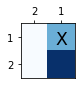

In [13]:
# annotate fillers with x

data = board2x2.states
# set some canvas
fig, ax = plt.subplots(figsize=(1,1))
# draw a heatmap
heatmap = ax.pcolor(board2x2.states, cmap=plt.cm.Blues)

# ensure square cells
ax.set_aspect("equal")

# put the major ticks at the middle of each cell
ax.set_xticks(np.arange(data.shape[1]) + 0.5, minor=False)
ax.set_yticks(np.arange(data.shape[0]) + 0.5, minor=False)

# put labels on top
ax.invert_yaxis()
ax.xaxis.tick_top()

# set labels
column_labels = clues2x2['cols']
row_labels = clues2x2['rows']

ax.set_xticklabels(column_labels, minor=False)
ax.set_yticklabels(row_labels, minor=False)


# annotate fillers
# expect (col,row) is (1,0) for row=0 col=1
w = board2x2.width
h = board2x2.height
nc = board2x2.width * board2x2.height
fillers_coordinates = [(p%w + 0.5, int(p/h) + 0.5) 
                       for (p,v) in enumerate(board2x2.states.reshape(nc)) 
                       if v==0]
# place an X in the center of each coordinate
for coord in fillers_coordinates:
    plt.text(coord[0], coord[1], 'X', 
         verticalalignment='center_baseline',
         horizontalalignment='center',
         fontsize='xx-large')


## 2.5. Change color of filler for white

In [14]:
import matplotlib.cm as cm
from matplotlib.colors import LinearSegmentedColormap
cdict = cm.get_cmap('Blues')._segmentdata
cdict

{'red': array([[0.        , 0.96862745, 0.96862745],
        [0.125     , 0.87058824, 0.87058824],
        [0.25      , 0.77647059, 0.77647059],
        [0.375     , 0.61960784, 0.61960784],
        [0.5       , 0.41960784, 0.41960784],
        [0.625     , 0.25882353, 0.25882353],
        [0.75      , 0.12941176, 0.12941176],
        [0.875     , 0.03137255, 0.03137255],
        [1.        , 0.03137255, 0.03137255]]),
 'green': array([[0.        , 0.98431373, 0.98431373],
        [0.125     , 0.92156863, 0.92156863],
        [0.25      , 0.85882353, 0.85882353],
        [0.375     , 0.79215686, 0.79215686],
        [0.5       , 0.68235294, 0.68235294],
        [0.625     , 0.57254902, 0.57254902],
        [0.75      , 0.44313725, 0.44313725],
        [0.875     , 0.31764706, 0.31764706],
        [1.        , 0.18823529, 0.18823529]]),
 'blue': array([[0.        , 1.        , 1.        ],
        [0.125     , 0.96862745, 0.96862745],
        [0.25      , 0.9372549 , 0.9372549 ],
      

In [15]:
cdict = {'red': [(0.0, 0.6196078431372549, 0.6196078431372549),
  (0.5, 1.0, 1.0),
  (1.0, 0.03137254901960784, 0.03137254901960784)],
 'green': [(0.0, 0.792156862745098, 0.792156862745098),
  (0.5, 1.0, 1.0),
  (1.0, 0.18823529411764706, 0.18823529411764706)],
 'blue': [(0.0, 0.8823529411764706, 0.8823529411764706),
  (0.5, 1.0, 1.0),
  (1.0, 0.4196078431372549, 0.4196078431372549)],
 'alpha': [(0.0, 1.0, 1.0),
  (0.5, 1.0, 1.0),
  (1.0, 1.0, 1.0)]}
nono_cmap = LinearSegmentedColormap('nono', cdict)
cdict

{'red': [(0.0, 0.6196078431372549, 0.6196078431372549),
  (0.5, 1.0, 1.0),
  (1.0, 0.03137254901960784, 0.03137254901960784)],
 'green': [(0.0, 0.792156862745098, 0.792156862745098),
  (0.5, 1.0, 1.0),
  (1.0, 0.18823529411764706, 0.18823529411764706)],
 'blue': [(0.0, 0.8823529411764706, 0.8823529411764706),
  (0.5, 1.0, 1.0),
  (1.0, 0.4196078431372549, 0.4196078431372549)],
 'alpha': [(0.0, 1.0, 1.0), (0.5, 1.0, 1.0), (1.0, 1.0, 1.0)]}

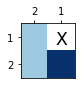

In [16]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib.colors import LinearSegmentedColormap

cdict = {'red': [(0.0, 0.6196078431372549, 0.6196078431372549),
  (0.5, 1.0, 1.0),
  (1.0, 0.03137254901960784, 0.03137254901960784)],
 'green': [(0.0, 0.792156862745098, 0.792156862745098),
  (0.5, 1.0, 1.0),
  (1.0, 0.18823529411764706, 0.18823529411764706)],
 'blue': [(0.0, 0.8823529411764706, 0.8823529411764706),
  (0.5, 1.0, 1.0),
  (1.0, 0.4196078431372549, 0.4196078431372549)],
 'alpha': [(0.0, 1.0, 1.0),
  (0.5, 1.0, 1.0),
  (1.0, 1.0, 1.0)]}
nono_cmap = LinearSegmentedColormap('nono', cdict)
cdict

# annotate fillers with x

data = board2x2.states
# set some canvas
fig, ax = plt.subplots(figsize=(1,1))
# draw a heatmap
heatmap = ax.pcolor(board2x2.states, cmap=nono_cmap)

# ensure square cells
ax.set_aspect("equal")

# put the major ticks at the middle of each cell
ax.set_xticks(np.arange(data.shape[1]) + 0.5, minor=False)
ax.set_yticks(np.arange(data.shape[0]) + 0.5, minor=False)

# put labels on top
ax.invert_yaxis()
ax.xaxis.tick_top()

# set labels
column_labels = clues2x2['cols']
row_labels = clues2x2['rows']

ax.set_xticklabels(column_labels, minor=False)
ax.set_yticklabels(row_labels, minor=False)


# annotate fillers
# expect (col,row) is (1,0) for row=0 col=1
w = board2x2.width
h = board2x2.height
nc = board2x2.width * board2x2.height
fillers_coordinates = [(p%w + 0.5, int(p/w) + 0.5) 
                       for (p,v) in enumerate(board2x2.states.reshape(nc)) 
                       if v==0]
# place an X in the center of each coordinate
for coord in fillers_coordinates:
    plt.text(coord[0], coord[1], 'X', 
         verticalalignment='center_baseline',
         horizontalalignment='center',
         fontsize='xx-large')


# 3. Board Plotter class

In [17]:
# reset vars from all previous tests
%reset -f

In [18]:
# test items
from episode01 import clues2x2, Board, BoardMark

In [50]:
from episode01 import Board, BoardMark
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib.colors import LinearSegmentedColormap

class BoardPlotter:
    '''
    Plot the board.
    Requiere %matplotlib inline .
    '''
    
    def __init__(self, some_clues):
        self.clues = some_clues
        
        # board dimensions
        self.width = len(self.clues["rows"])
        self.height = len(self.clues["cols"])
        self.flat_length = self.width * self.height
      
        # rows labels
        def row_clue_to_label(v):
            return str(v) if not isinstance(v, list) else ' '.join(map(str,v))
        self.rows_labels = list(map(row_clue_to_label, self.clues['rows']))

        # columns labels
        def col_clue_to_label(v):
            #print(v)
            return str(v) if not isinstance(v, list) else '\n'.join(map(str,v))
        self.columns_labels = list(map(col_clue_to_label, self.clues['cols']))

        # color map
        self.cmap = self.build_color_map()

        
    def build_color_map(self):
        cdict = {'red': [(0.0, 0.6196078431372549, 0.6196078431372549),
          (0.5, 1.0, 1.0),
          (1.0, 0.03137254901960784, 0.03137254901960784)],
         'green': [(0.0, 0.792156862745098, 0.792156862745098),
          (0.5, 1.0, 1.0),
          (1.0, 0.18823529411764706, 0.18823529411764706)],
         'blue': [(0.0, 0.8823529411764706, 0.8823529411764706),
          (0.5, 1.0, 1.0),
          (1.0, 0.4196078431372549, 0.4196078431372549)],
         'alpha': [(0.0, 1.0, 1.0),
          (0.5, 1.0, 1.0),
          (1.0, 1.0, 1.0)]}
        nono_cmap = LinearSegmentedColormap('nono', cdict)
        return nono_cmap

        
    def show(self, a_board):
        # WARNING :  the board is row col, while the fig is col row
        data = a_board.states
        
        # set some canvas
        fig, ax = plt.subplots(figsize=(1,1))
        
        # draw a heatmap
        heatmap = ax.pcolor(data, cmap=self.cmap)

        # ensure square cells
        ax.set_aspect("equal")

        # put the major ticks at the middle of each cell
        ax.set_xticks(np.arange(data.shape[1]) + 0.5, minor=False)
        ax.set_yticks(np.arange(data.shape[0]) + 0.5, minor=False)

        # put labels on top
        ax.invert_yaxis()
        ax.xaxis.tick_top()

        # set labels
        ax.set_xticklabels(self.columns_labels, minor=False)
        ax.set_yticklabels(self.rows_labels, minor=False)


        # annotate fillers
        # expect (col,row) is (1,0) for row=0 col=1
        fillers_coordinates = [(p%self.width + 0.5, int(p/self.width) + 0.5) 
                               for (p,v) in enumerate(data.reshape(self.flat_length)) 
                               if v==0]
        
        # place an X in the center of each coordinate for fillers
        for coord in fillers_coordinates:
            plt.text(coord[0], coord[1], 'X', 
                 verticalalignment='center_baseline',
                 horizontalalignment='center',
                 fontsize='xx-large')

        plt.show()

# 4. Tests

## 4.1. Basic check with mini board

In [20]:
# clues for mini game
clues2x2

{'rows': [1, 2], 'cols': [2, 1]}

cols: 2 1
rows:
1
2
[['.' '.']
 ['.' '.']]


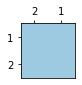

cols: 2 1
rows:
1
2
[['.' 'x']
 ['.' 'o']]


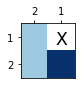

In [51]:
board2x2 = Board(clues2x2)
plotter2x2 = BoardPlotter(clues2x2)
board2x2.prettyprint()
plotter2x2.show(board2x2)

board2x2.mark(0, 1, BoardMark.FILLER) 
board2x2.mark(1, 1, BoardMark.BLACK) 
board2x2.prettyprint()
plotter2x2.show(board2x2)

## 4.2. Basic check with 5x5 board

In [22]:
from episode01 import clues5x5s

In [23]:
clues5x5s

{'rows': [1, 3, [1, 1], 3, 5], 'cols': [1, 4, [2, 2], 4, 1]}

cols: 1 4 [2, 2] 4 1
rows:
1
3
[1, 1]
3
5
[['.' '.' '.' '.' '.']
 ['.' '.' '.' '.' '.']
 ['.' '.' '.' '.' '.']
 ['.' '.' '.' '.' '.']
 ['.' '.' '.' '.' '.']]


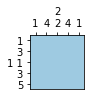

cols: 1 4 [2, 2] 4 1
rows:
1
3
[1, 1]
3
5
[['.' '.' 'o' '.' '.']
 ['.' '.' 'o' '.' '.']
 ['.' '.' 'x' '.' '.']
 ['.' '.' 'o' '.' '.']
 ['o' 'o' 'o' 'o' 'o']]


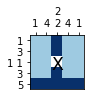

In [24]:
board5x5s = Board(clues5x5s)
plotter5x5s = BoardPlotter(clues5x5s)
board5x5s.prettyprint()
plotter5x5s.show(board5x5s)

# row 4 is ooooo
board5x5s.mark(4, 0, BoardMark.BLACK) 
board5x5s.mark(4, 1, BoardMark.BLACK) 
board5x5s.mark(4, 2, BoardMark.BLACK) 
board5x5s.mark(4, 3, BoardMark.BLACK) 
board5x5s.mark(4, 4, BoardMark.BLACK) 
# col 2 is ooxoo
board5x5s.mark(0, 2, BoardMark.BLACK) 
board5x5s.mark(1, 2, BoardMark.BLACK) 
board5x5s.mark(2, 2, BoardMark.FILLER) 
board5x5s.mark(3, 2, BoardMark.BLACK) 
board5x5s.mark(4, 2, BoardMark.BLACK) 

board5x5s.prettyprint()
plotter5x5s.show(board5x5s)

remarks:
- size of figure must depend on board dimensions
- need a to take care of split clues: avoid [] and print cols clues over multiple lines
```
clues = {
    'rows': [1, 3, [1,1], 3, 5], -> [1, 3, "1 1", 3, 5]
    'cols': [1, 4, [2,2], 4, 1]  -> [1, 4, "2\n2", 4, 1]
}
```

# 5. Generalize for split labels and large size

## 5.1. Experiments

In [25]:
clues5x5s

{'rows': [1, 3, [1, 1], 3, 5], 'cols': [1, 4, [2, 2], 4, 1]}

In [26]:
def row_clue_to_label(v):
    print(v)
    return str(v) if not isinstance(v, list) else ' '.join(map(str,v))

list(map(row_clue_to_label, clues5x5s['rows']))

1
3
[1, 1]
3
5


['1', '3', '1 1', '3', '5']

In [27]:
# need str to be able to join
def col_clue_to_label(v):
    print(v)
    return str(v) if not isinstance(v, list) else '\n'.join(map(str,v))

list(map(col_clue_to_label, clues5x5s['cols']))

1
4
[2, 2]
4
1


['1', '4', '2\n2', '4', '1']

## 5.2. Updated class

In [28]:
%reset -f

In [29]:
# test items
from episode01 import clues2x2, clues5x5s

In [44]:
from episode01 import Board, BoardMark
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib.colors import LinearSegmentedColormap

class BoardPlotter:
    '''
    Plot the board.
    Requiere %matplotlib inline .
    '''
    
    def __init__(self, some_clues):
        self.clues = some_clues
        
        # board dimensions
        self.width = len(self.clues["rows"])
        self.height = len(self.clues["cols"])
        self.flat_length = self.width * self.height

        # guess the figure size 
        # rule of thumb
        # 1 fits 2 cells
        # 2 fits 5 cols
        self.fig_width = int(self.width/2) 
        self.fig_height = int(self.height /2) 

        # rows labels
        def row_clue_to_label(v):
            return str(v) if not isinstance(v, list) else ' '.join(map(str,v))
        self.rows_labels = list(map(row_clue_to_label, self.clues['rows']))

        # columns labels
        def col_clue_to_label(v):
            #print(v)
            return str(v) if not isinstance(v, list) else '\n'.join(map(str,v))
        self.columns_labels = list(map(col_clue_to_label, self.clues['cols']))

        # color map
        self.cmap = self.build_color_map()

        
    def build_color_map(self):
        cdict = {'red': [(0.0, 0.6196078431372549, 0.6196078431372549),
          (0.5, 1.0, 1.0),
          (1.0, 0.03137254901960784, 0.03137254901960784)],
         'green': [(0.0, 0.792156862745098, 0.792156862745098),
          (0.5, 1.0, 1.0),
          (1.0, 0.18823529411764706, 0.18823529411764706)],
         'blue': [(0.0, 0.8823529411764706, 0.8823529411764706),
          (0.5, 1.0, 1.0),
          (1.0, 0.4196078431372549, 0.4196078431372549)],
         'alpha': [(0.0, 1.0, 1.0),
          (0.5, 1.0, 1.0),
          (1.0, 1.0, 1.0)]}
        nono_cmap = LinearSegmentedColormap('nono', cdict)
        return nono_cmap

        
    def show(self, a_board):
        # WARNING :  the board is row col, while the fig is col row
        data = a_board.states
        
        # set some canvas
        fig, ax = plt.subplots(figsize=(self.fig_width, self.fig_height))
        
        # draw a heatmap
        heatmap = ax.pcolor(data, cmap=self.cmap)

        # ensure square cells
        ax.set_aspect("equal")

        # put the major ticks at the middle of each cell
        ax.set_xticks(np.arange(data.shape[1]) + 0.5, minor=False)
        ax.set_yticks(np.arange(data.shape[0]) + 0.5, minor=False)

        # put labels on top
        ax.invert_yaxis()
        ax.xaxis.tick_top()

        # set labels
        ax.set_xticklabels(self.columns_labels, minor=False)
        ax.set_yticklabels(self.rows_labels, minor=False)


        # annotate fillers
        # expect (col,row) is (1,0) for row=0 col=1
        fillers_coordinates = [(p%self.width + 0.5, int(p/self.width) + 0.5) 
                               for (p,v) in enumerate(data.reshape(self.flat_length)) 
                               if v==0]

        # place an X in the center of each coordinate for fillers
        for coord in fillers_coordinates:
            plt.text(coord[0], coord[1], 'X', 
                 verticalalignment='center_baseline',
                 horizontalalignment='center',
                 fontsize='xx-large')

        plt.show()

## 5.3. Tests

cols: 1 4 [2, 2] 4 1
rows:
1
3
[1, 1]
3
5
[['.' '.' '.' '.' '.']
 ['.' '.' '.' '.' '.']
 ['.' '.' '.' '.' '.']
 ['.' '.' '.' '.' '.']
 ['.' '.' '.' '.' '.']]


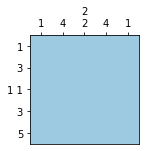

cols: 1 4 [2, 2] 4 1
rows:
1
3
[1, 1]
3
5
[['.' '.' 'o' '.' '.']
 ['.' '.' 'o' '.' '.']
 ['.' '.' 'x' '.' '.']
 ['.' '.' 'o' '.' '.']
 ['o' 'o' 'o' 'o' 'o']]


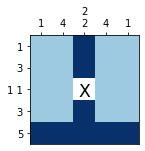

In [45]:
board5x5s = Board(clues5x5s)
plotter5x5s = BoardPlotter(clues5x5s)
board5x5s.prettyprint()
plotter5x5s.show(board5x5s)

# row 4 is ooooo
board5x5s.mark(4, 0, BoardMark.BLACK) 
board5x5s.mark(4, 1, BoardMark.BLACK) 
board5x5s.mark(4, 2, BoardMark.BLACK) 
board5x5s.mark(4, 3, BoardMark.BLACK) 
board5x5s.mark(4, 4, BoardMark.BLACK) 
# col 2 is ooxoo
board5x5s.mark(0, 2, BoardMark.BLACK) 
board5x5s.mark(1, 2, BoardMark.BLACK) 
board5x5s.mark(2, 2, BoardMark.FILLER) 
board5x5s.mark(3, 2, BoardMark.BLACK) 
board5x5s.mark(4, 2, BoardMark.BLACK) 

board5x5s.prettyprint()
plotter5x5s.show(board5x5s)

## 5.4. Test cell by cell

cols: 1 4 [2, 2] 4 1
rows:
1
3
[1, 1]
3
5
[['.' '.' '.' '.' '.']
 ['.' '.' '.' '.' '.']
 ['.' '.' '.' '.' '.']
 ['.' '.' '.' '.' '.']
 ['.' '.' '.' '.' '.']]


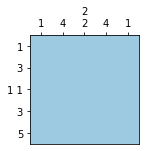

cols: 1 4 [2, 2] 4 1
rows:
1
3
[1, 1]
3
5
[['x' '.' '.' '.' '.']
 ['.' '.' '.' '.' '.']
 ['.' '.' '.' '.' '.']
 ['.' '.' '.' '.' '.']
 ['.' '.' '.' '.' '.']]


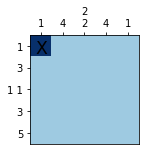

cols: 1 4 [2, 2] 4 1
rows:
1
3
[1, 1]
3
5
[['x' 'x' '.' '.' '.']
 ['.' '.' '.' '.' '.']
 ['.' '.' '.' '.' '.']
 ['.' '.' '.' '.' '.']
 ['.' '.' '.' '.' '.']]


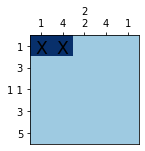

In [32]:
board5x5s = Board(clues5x5s)
plotter5x5s = BoardPlotter(clues5x5s)
board5x5s.prettyprint()
plotter5x5s.show(board5x5s)

# WARNING confusion when only one type filler/black 
# fiw min and lmax
board5x5s.mark(0, 0, BoardMark.FILLER) 
board5x5s.prettyprint()
plotter5x5s.show(board5x5s)
board5x5s.mark(0, 1, BoardMark.FILLER) 
board5x5s.prettyprint()
plotter5x5s.show(board5x5s)


In [33]:
# WARNING confusion when only one type filler/black 
# add value range to avoid filler is mistaken for black 
# bacuase the range of actual values is -1 0

# 6. Fix colors for values

In [34]:
%reset -f

## 6.1. Updated class

In [35]:
# test items
from episode01 import clues2x2, clues5x5s

In [46]:
from episode01 import Board, BoardMark
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib.colors import LinearSegmentedColormap

class BoardPlotter:
    '''
    Plot the board.
    Requiere %matplotlib inline .
    '''
    
    def __init__(self, some_clues):
        self.clues = some_clues
        
        # board dimensions
        self.width = len(self.clues["rows"])
        self.height = len(self.clues["cols"])
        self.flat_length = self.width * self.height

        # guess the figure size 
        # rule of thumb
        # 1 fits 2 cells
        # 2 fits 5 cols
        self.fig_width = int(self.width/2) 
        self.fig_height = int(self.height /2) 

        # rows labels
        def row_clue_to_label(v):
            return str(v) if not isinstance(v, list) else ' '.join(map(str,v))
        self.rows_labels = list(map(row_clue_to_label, self.clues['rows']))

        # columns labels
        def col_clue_to_label(v):
            #print(v)
            return str(v) if not isinstance(v, list) else '\n'.join(map(str,v))
        self.columns_labels = list(map(col_clue_to_label, self.clues['cols']))

        # color map
        self.cmap = self.build_color_map()

        
    def build_color_map(self):
        cdict = {'red': [(0.0, 0.6196078431372549, 0.6196078431372549),
          (0.5, 1.0, 1.0),
          (1.0, 0.03137254901960784, 0.03137254901960784)],
         'green': [(0.0, 0.792156862745098, 0.792156862745098),
          (0.5, 1.0, 1.0),
          (1.0, 0.18823529411764706, 0.18823529411764706)],
         'blue': [(0.0, 0.8823529411764706, 0.8823529411764706),
          (0.5, 1.0, 1.0),
          (1.0, 0.4196078431372549, 0.4196078431372549)],
         'alpha': [(0.0, 1.0, 1.0),
          (0.5, 1.0, 1.0),
          (1.0, 1.0, 1.0)]}
        nono_cmap = LinearSegmentedColormap('nono', cdict)
        return nono_cmap

        
    def show(self, a_board):
        # WARNING :  the board is row col, while the fig is col row
        data = a_board.states
        
        # set some canvas
        fig, ax = plt.subplots(figsize=(self.fig_width, self.fig_height))
        
        # draw a heatmap
        # ensure value range is -1 to 1
        heatmap = ax.pcolor(data, cmap=self.cmap, vmin=-1, vmax=1)

        # ensure square cells
        ax.set_aspect("equal")

        # put the major ticks at the middle of each cell
        ax.set_xticks(np.arange(data.shape[1]) + 0.5, minor=False)
        ax.set_yticks(np.arange(data.shape[0]) + 0.5, minor=False)

        # put labels on top
        ax.invert_yaxis()
        ax.xaxis.tick_top()

        # set labels
        ax.set_xticklabels(self.columns_labels, minor=False)
        ax.set_yticklabels(self.rows_labels, minor=False)


        # annotate fillers
        # expect (col,row) is (1,0) for row=0 col=1
        fillers_coordinates = [(p%self.width + 0.5, int(p/self.width) + 0.5) 
                               for (p,v) in enumerate(data.reshape(self.flat_length)) 
                               if v==0]

        # place an X in the center of each coordinate for fillers
        for coord in fillers_coordinates:
            plt.text(coord[0], coord[1], 'X', 
                 verticalalignment='center_baseline',
                 horizontalalignment='center',
                 fontsize='xx-large')

        plt.show()

## 6.2. Test fillers only

cols: 1 4 [2, 2] 4 1
rows:
1
3
[1, 1]
3
5
[['.' '.' '.' '.' '.']
 ['.' '.' '.' '.' '.']
 ['.' '.' '.' '.' '.']
 ['.' '.' '.' '.' '.']
 ['.' '.' '.' '.' '.']]


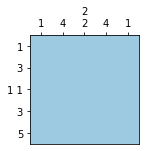

cols: 1 4 [2, 2] 4 1
rows:
1
3
[1, 1]
3
5
[['x' '.' '.' '.' '.']
 ['.' '.' '.' '.' '.']
 ['.' '.' '.' '.' '.']
 ['.' '.' '.' '.' '.']
 ['.' '.' '.' '.' '.']]


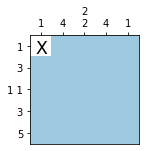

cols: 1 4 [2, 2] 4 1
rows:
1
3
[1, 1]
3
5
[['x' 'x' '.' '.' '.']
 ['.' '.' '.' '.' '.']
 ['.' '.' '.' '.' '.']
 ['.' '.' '.' '.' '.']
 ['.' '.' '.' '.' '.']]


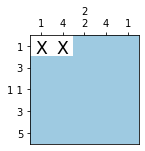

In [47]:
board5x5s = Board(clues5x5s)
plotter5x5s = BoardPlotter(clues5x5s)
board5x5s.prettyprint()
plotter5x5s.show(board5x5s)

board5x5s.mark(0, 0, BoardMark.FILLER) 
board5x5s.prettyprint()
plotter5x5s.show(board5x5s)
board5x5s.mark(0, 1, BoardMark.FILLER) 
board5x5s.prettyprint()
plotter5x5s.show(board5x5s)

## 6.3. Test mixed black and fillers

cols: 1 4 [2, 2] 4 1
rows:
1
3
[1, 1]
3
5
[['.' '.' '.' '.' '.']
 ['.' '.' '.' '.' '.']
 ['.' '.' '.' '.' '.']
 ['.' '.' '.' '.' '.']
 ['.' '.' '.' '.' '.']]


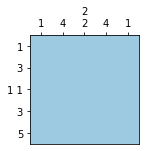

cols: 1 4 [2, 2] 4 1
rows:
1
3
[1, 1]
3
5
[['x' '.' '.' '.' '.']
 ['.' '.' '.' '.' '.']
 ['.' '.' '.' '.' '.']
 ['.' '.' '.' '.' '.']
 ['.' '.' '.' '.' '.']]


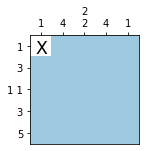

cols: 1 4 [2, 2] 4 1
rows:
1
3
[1, 1]
3
5
[['x' 'x' '.' '.' '.']
 ['.' '.' '.' '.' '.']
 ['.' '.' '.' '.' '.']
 ['.' '.' '.' '.' '.']
 ['.' '.' '.' '.' '.']]


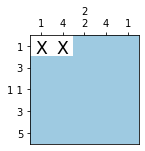

cols: 1 4 [2, 2] 4 1
rows:
1
3
[1, 1]
3
5
[['x' 'x' 'o' '.' '.']
 ['.' '.' '.' '.' '.']
 ['.' '.' '.' '.' '.']
 ['.' '.' '.' '.' '.']
 ['.' '.' '.' '.' '.']]


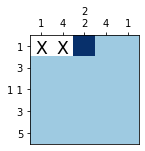

cols: 1 4 [2, 2] 4 1
rows:
1
3
[1, 1]
3
5
[['x' 'x' 'o' 'o' '.']
 ['.' '.' '.' '.' '.']
 ['.' '.' '.' '.' '.']
 ['.' '.' '.' '.' '.']
 ['.' '.' '.' '.' '.']]


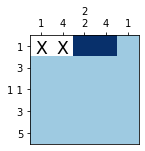

cols: 1 4 [2, 2] 4 1
rows:
1
3
[1, 1]
3
5
[['x' 'x' 'o' 'o' '.']
 ['x' '.' '.' '.' '.']
 ['.' '.' '.' '.' '.']
 ['.' '.' '.' '.' '.']
 ['.' '.' '.' '.' '.']]


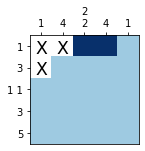

cols: 1 4 [2, 2] 4 1
rows:
1
3
[1, 1]
3
5
[['x' 'x' 'o' 'o' '.']
 ['x' '.' '.' '.' '.']
 ['x' '.' '.' '.' '.']
 ['.' '.' '.' '.' '.']
 ['.' '.' '.' '.' '.']]


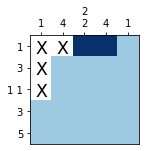

In [38]:
board5x5s = Board(clues5x5s)
plotter5x5s = BoardPlotter(clues5x5s)
board5x5s.prettyprint()
plotter5x5s.show(board5x5s)

board5x5s.mark(0, 0, BoardMark.FILLER) 
board5x5s.prettyprint()
plotter5x5s.show(board5x5s)
board5x5s.mark(0, 1, BoardMark.FILLER) 
board5x5s.prettyprint()
plotter5x5s.show(board5x5s)
board5x5s.mark(0, 2, BoardMark.BLACK) 
board5x5s.prettyprint()
plotter5x5s.show(board5x5s)
board5x5s.mark(0, 3, BoardMark.BLACK) 
board5x5s.prettyprint()
plotter5x5s.show(board5x5s)
board5x5s.mark(1, 0, BoardMark.FILLER) 
board5x5s.prettyprint()
plotter5x5s.show(board5x5s)
board5x5s.mark(2, 0, BoardMark.FILLER) 
board5x5s.prettyprint()
plotter5x5s.show(board5x5s)

# 7. Test non square board

cols: 1 3 2 3 1
rows:
1
3
[1, 1]
[['.' '.' '.' '.' '.']
 ['.' '.' '.' '.' '.']
 ['.' '.' '.' '.' '.']]


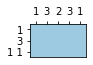

cols: 1 3 2 3 1
rows:
1
3
[1, 1]
[['.' 'o' '.' 'o' '.']
 ['.' 'o' '.' 'o' '.']
 ['x' 'o' 'x' 'o' 'x']]


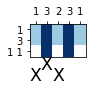

In [39]:
clues1 = {
    'rows': [1, 3, [1,1]],
    'cols': [1, 3, 2, 3, 1]
}
board1 = Board(clues1)
plotter1 = BoardPlotter(clues1)
board1.prettyprint()
plotter1.show(board1)

# col 2 is ooo
board1.mark(0, 1, BoardMark.BLACK) 
board1.mark(1, 1, BoardMark.BLACK) 
board1.mark(2, 1, BoardMark.BLACK) 
# col 3 is ooo
board1.mark(0, 3, BoardMark.BLACK) 
board1.mark(1, 3, BoardMark.BLACK) 
board1.mark(2, 3, BoardMark.BLACK) 
# row 2 is xoxox
board1.mark(2, 0, BoardMark.FILLER) 
board1.mark(2, 2, BoardMark.FILLER) 
board1.mark(2, 4, BoardMark.FILLER) 

board1.prettyprint()
plotter1.show(board1)


# 8. Wrap up

We have learned
- How to use matplotlib
- How to display a plot in Jupyter
- How to set labels
- How to change colors

The class is saved in episode03.py.




## 8.1. Quick test of saved class

In [40]:
%reset -f

In [41]:
from episode01 import clues2x2, clues5x5s, Board, BoardMark

In [52]:
from episode03a import BoardPlotter

cols: 1 4 [2, 2] 4 1
rows:
1
3
[1, 1]
3
5
[['.' '.' '.' '.' '.']
 ['.' '.' '.' '.' '.']
 ['.' '.' '.' '.' '.']
 ['.' '.' '.' '.' '.']
 ['.' '.' '.' '.' '.']]


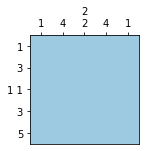

In [43]:
board5x5s = Board(clues5x5s)
plotter5x5s = BoardPlotter(clues5x5s)
board5x5s.prettyprint()
plotter5x5s.show(board5x5s)